# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


In [4]:
fifa.dtypes

Name               object
Age                 int64
Nationality        object
Overall             int64
Potential           int64
Club               object
Value              object
Preferred Foot     object
Position           object
Weak Foot         float64
Acceleration      float64
SprintSpeed       float64
Stamina           float64
Strength          float64
LongShots         float64
Aggression        float64
Interceptions     float64
Positioning       float64
Vision            float64
Penalties         float64
dtype: object

Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# Your code here:
#Odio Regex,pero no me sale como quiero,mañana lo sigo intentando.
fifa["ValueNumeric"]=fifa["Value"].str.findall(r'\d+(?:\.\d+)?').apply(', '.join)
fifa['ValueNumeric']=fifa["ValueNumeric"].astype(float)
fifa[["ValueNumeric","Value"]].head()

,ValueNumeric,Value
0,110.5,€110.5M
1,77.0,€77M
2,118.5,€118.5M
3,72.0,€72M
4,102.0,€102M


In [6]:
#Investigando me he encontrado esto,y me parece muy útil para estadística,mola!
import researchpy as rp
rp.summary_cont(fifa['ValueNumeric'])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,ValueNumeric,18207.0,265.026929,289.564928,2.145985,260.820595,269.233263


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [7]:
# Your code here:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
#ols=Ordinary Least-Squares==LR
#Se utiliza C para sustituir pivot y crear una tabla con los propios valores del df
#Se utilizan los valores que siguen una LR
#fit() no es una función propia de Sklearn??
anova_model=ols('ValueNumeric ~ C(fifa["Preferred Foot"])+C(fifa["Position"])', data=fifa).fit()
anova_model

In [8]:
import statsmodels.api as sm 
anova_table=sm.stats.anova_lm(anova_model,typ=2)
anova_table
#No se deberían sustituír los valores Nan antes?no afectan para el cálculo?


,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",7.292211e+04,1.0,0.871795,3.504713e-01
"C(fifa[""Position""])",8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:
El análisis de la varianza permite probar que existen diferencias entre las medias de las muestras que se escogen.Si el valor es aproximadamente igual entonces se acepta la hipotesis nula(que las muestras comparten factores comunes o son iguales)
Tomamos como hipótesis nula que la posición en la que juegan los jugadores es distinta y el pie que con el juegan mejor afecta a su valor en el mercado.
Lo primero que hace el análisis de la varianza es la suma de las medias de las muestras para saber si son distintas.Lo siguiente es analizar si la media dentro de las muestras es distinta para saber sobre que muestra se está trabajando.Como el factor calculado es mayor que que la hipótesis nula esta no se puede rechazar.Por lo tanto el valor de mercado del jugador si está afectado por el pie con el que mejor juegan y su posición dentro del campo.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [10]:
# Your code here:
anova_model1=ols('ValueNumeric ~ C(Nationality)',data=fifa).fit()
anova_table2=sm.stats.anova_lm(anova_model1,typ=2)
anova_table2


,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


In [ ]:
#No se puede extraer una conclusión clara el modelo anova se utiliza para comparar por lo menos dos espacios muestrales,aqui solo se utliza uno.Po ejemplo que la nacionalidad y la acelaración afectan a su precio de mercado.
#Viendo lo anterior se podría decir que la hipótesis nula no se acepta puesto que el factor(F) es mayor que el factor entre las medias(PR>F).

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:
fifa.isnull().any()
fifa.dropna(how='any',inplace=True)
fifa.shape

(17918, 21)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [12]:
# Your code here:
#add_constant añade columna de unos para sustituir los valores vacíos.
X = sm.add_constant(fifa[["SprintSpeed","Stamina"]])
Y = fifa["ValueNumeric"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Thu, 09 Jul 2020   Prob (F-statistic):             0.0116
Time:                        01:56:17   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [16]:
# Your conclusions here:
A = np.identity(len(model.params))
A = A[1:,:]
print(model.f_test(A))


<F test: F=array([[1054.22930028]]), p=9.154945285033983e-225, df_denom=1.79e+04, df_num=1>


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [13]:
# Your code here:
X = sm.add_constant(fifa[["Potential"]])
Y = fifa["ValueNumeric"]

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):          9.15e-225
Time:                        01:56:27   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [18]:
# Your conclusions here:
A = np.identity(len(model.params))
A = A[1:,:]
print(model.f_test(A))

<F test: F=array([[1054.22930028]]), p=9.154945285033983e-225, df_denom=1.79e+04, df_num=1>


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

Text(0, 0.5, 'Potential')

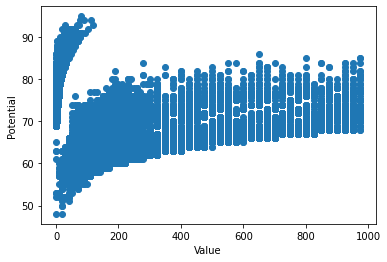

In [14]:
# Your code here:
import matplotlib.pyplot as plt
X=fifa["ValueNumeric"]
Y=fifa["Potential"]
plt.scatter(X,Y)
plt.xlabel("Value")
plt.ylabel("Potential")
